In [1]:
import numpy as np
import xarray as xr
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

D:\Anaconda-DATA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
track = pd.read_excel("D:/PAPERBANJIR/EXCEL PROPERTI/raw14_00_16_12.xlsx", sheet_name="kasus1")

In [10]:
track

,geometry,time,itime,dtime,mcs_id,mcs_class,number,area(km2),eccentricity,mean_pr
0,"102.94999694824219 -4.505351189701567, 105.65...",2017-07-14 12:00:00,12,0.041667,42,CCC,0,4.700228e+05,0.877902,NaN
1,"103.05000305175781 -4.907592943476779, 105.44...",2017-07-14 13:00:00,13,0.041667,42,CCC,1,4.771287e+05,0.896562,NaN
2,"104.75 -5.0835767604005415, 104.8499984741211...",2017-07-14 14:00:00,14,0.041667,42,CCC,2,4.424795e+05,0.877420,NaN
3,"104.55000305175781 -5.061679045858873, 106.05...",2017-07-14 15:00:00,15,0.041667,42,CCC,3,4.990400e+05,0.889299,NaN
4,"105.75 -4.855533009470235, 105.75000000000001...",2017-07-14 16:00:00,16,0.041667,42,CCC,4,5.838545e+05,0.858723,NaN
5,"104.94999694824219 -5.136601284968124, 106.84...",2017-07-14 17:00:00,17,0.041667,42,CCC,5,4.585760e+05,0.932723,NaN
6,"104.75 -5.370414829162655, 108.3499984741211 ...",2017-07-14 18:00:00,18,0.041667,42,CCC,6,6.315396e+05,0.745708,NaN
7,"104.05000305175781 -7.077081531119889, 107.94...",2017-07-14 19:00:00,19,0.041667,42,CCC,8,3.380435e+05,0.729589,NaN
8,"110.55000305175781 -5.506060636964312, 110.57...",2017-07-14 20:00:00,20,0.041667,42,CCC,10,4.451104e+05,0.834957,NaN
9,"95.31205759083394 -8.949999809265137, 97.3577...",2017-07-14 21:00:00,21,0.041667,70,CCC,12,9.574655e+05,0.871447,NaN


In [4]:
def create_polygon(df):
    polygons = []
    for _, row in df.iterrows():
        if isinstance(row['geometry'], str):
            coords = [tuple(map(float, point.split())) for point in row['geometry'].split(',')]
            polygon = Polygon(coords)
            polygons.append(polygon)
    return polygons

In [11]:
track['geometry'] = create_polygon(track)
track

,geometry,time,itime,dtime,mcs_id,mcs_class,number,area(km2),eccentricity,mean_pr
0,POLYGON ((102.94999694824219 -4.50535118970156...,2017-07-14 12:00:00,12,0.041667,42,CCC,0,4.700228e+05,0.877902,NaN
1,POLYGON ((103.05000305175781 -4.90759294347677...,2017-07-14 13:00:00,13,0.041667,42,CCC,1,4.771287e+05,0.896562,NaN
2,"POLYGON ((104.75 -5.0835767604005415, 104.8499...",2017-07-14 14:00:00,14,0.041667,42,CCC,2,4.424795e+05,0.877420,NaN
3,POLYGON ((104.55000305175781 -5.06167904585887...,2017-07-14 15:00:00,15,0.041667,42,CCC,3,4.990400e+05,0.889299,NaN
4,"POLYGON ((105.75 -4.855533009470235, 105.75000...",2017-07-14 16:00:00,16,0.041667,42,CCC,4,5.838545e+05,0.858723,NaN
5,POLYGON ((104.94999694824219 -5.13660128496812...,2017-07-14 17:00:00,17,0.041667,42,CCC,5,4.585760e+05,0.932723,NaN
6,"POLYGON ((104.75 -5.370414829162655, 108.34999...",2017-07-14 18:00:00,18,0.041667,42,CCC,6,6.315396e+05,0.745708,NaN
7,POLYGON ((104.05000305175781 -7.07708153111988...,2017-07-14 19:00:00,19,0.041667,42,CCC,8,3.380435e+05,0.729589,NaN
8,POLYGON ((110.55000305175781 -5.50606063696431...,2017-07-14 20:00:00,20,0.041667,42,CCC,10,4.451104e+05,0.834957,NaN
9,POLYGON ((95.31205759083394 -8.949999809265137...,2017-07-14 21:00:00,21,0.041667,70,CCC,12,9.574655e+05,0.871447,NaN


In [12]:
result = gpd.GeoDataFrame(track, geometry=track['geometry'], crs="EPSG:4326")

#find centroid
result['centroid'] = result['geometry'].centroid

#extract the x, y for centroid
result['centroid_x'] = result['centroid'].x
result['centroid_y'] = result['centroid'].y

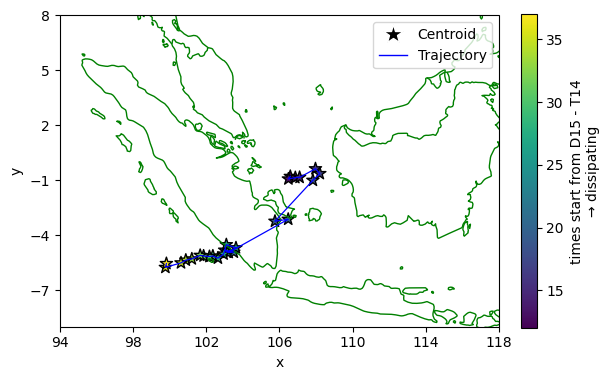

In [13]:
plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([94, 118, -9, 8], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(94, 119, 4), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(8, -9, -3), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='g')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='g')

norm = mcolors.Normalize(vmin=result['itime'].min(), vmax=result['itime'].max())
map_ = cm.viridis 
colors = map_(norm(result['itime']))
coordinates = [(108.2, -2.85)]

#for coord in coordinates:
 #   plt.plot(coord[0], coord[1], marker='o', color='red', markeredgecolor='black', markersize=5, transform=ccrs.PlateCarree())

ax.scatter(result['centroid_x'], result['centroid_y'], color=colors, marker='*', edgecolor='k', s=85, transform=ccrs.PlateCarree())
ax.plot(result['centroid_x'], result['centroid_y'], color='blue', linewidth=0.9, transform=ccrs.PlateCarree())

cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=map_), ax=ax, orientation='vertical', pad=0.04, shrink=0.51)
cbar.set_label('times start from D15 - T14\n\u2192 dissipating', rotation=90)

plt.xlabel('x')
plt.ylabel('y')

p1 = plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='k', markersize=15, label='Centroid', linestyle='None')
p2 = plt.Line2D([0], [0], color='blue', lw=1, label='Trajectory')
#p3 = plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='r', markersize=8, label='Disaster', linestyle='None')

plt.legend(handles=[p1, p2], loc='upper right')
#plt.title('simulated convective cloud cluster propagation \n at 1st case')

#output = 'D:/PAPERBANJIR/OUTPUT/'
#plt.savefig(os.path.join(output, 'kasus2.png'), bbox_inches='tight', dpi=900)